In [1]:
from __future__ import print_function

# Handle data
import json
import operator
import collections
import re

# Handle table-like data 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
import pandas as pd
ewg_ing_df = pd.read_json('ingredients_products_keys_fixed/ewg_ingredients.json', orient = 'index')

In [3]:
print(ewg_ing_df.iloc[1])

allergy_imm_tox_score                                                    0
cancer_score                                                             0
data_availability                                                     None
dev_reprod_tox_score                                                     0
function_list                                                          NaN
ingredient_id            L3NraW5kZWVwL2luZ3JlZGllbnQvNzA0MDA1L01PTkFSRE...
ingredient_name                          MONARDA FISTULOSA (WILD BERGAMOT)
ingredient_score                                                         1
overall_hazard_score                                                    19
synonym_list                                                           NaN
url                      http://www.ewg.org/skindeep/ingredient/704005/...
use_restrict_score                                                       0
Name: L3NraW5kZWVwL2luZ3JlZGllbnQvNzA0MDA1L01PTkFSREFfRklTVFVMT1NBXyUyOFdJTERfQkVSR0FNT1QlMjkv, dtyp

In [6]:
ing_map = {}
for i in range(len(ewg_ing_df)):
    ID = ewg_ing_df.iloc[i]['ingredient_id']
    name = ewg_ing_df.iloc[i]['ingredient_name']
    ing_map[ID] = name

In [7]:
ewg_prd_df = pd.read_json('ingredients_products_keys_fixed/ewg_products.json', orient = 'index')

In [8]:
print(ewg_prd_df.iloc[0])

allergy_imm_tox_score                                              39.2667
cancer_score                                                             0
data_availability                                                     Fair
dev_reprod_tox_score                                                     0
ingredient_list          [L3NraW5kZWVwL2luZ3JlZGllbnQvNzAxNTIwL0NPQ0FNS...
overall_hazard_score                                                    38
product_id               L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTU5L0Vzc2VuY2Vfb2...
product_name             Essence of Wellbeing Rosemary & Lavender Shamp...
product_score                                                            2
product_type                                                       Shampoo
url                      http://www.ewg.org/skindeep/product/107559/Ess...
use_restrict_score                                                 88.6667
Name: L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTU5L0Vzc2VuY2Vfb2ZfV2VsbGJlaW5nX1Jvc2VtYXJ5XyUyNl9MYXZlbmRlcl9TaG

In [9]:
from collections import Counter
n = len(ewg_prd_df)
ing_lists = []
ing_cnts = Counter()
for i in range(n):
    try:
        new_list = []
        ing_list = ewg_prd_df.iloc[i]['ingredient_list']
        for ID in ing_list:
            new_list.append(ing_map[ID])
            ing_cnts[ing_map[ID]] += 1
        #print(new_list)
        ing_lists.append(new_list)
    except:
        ing_lists.append([''])
        print('Failed on',i, 'no ingredient list.')

Failed on 493 no ingredient list.
Failed on 23627 no ingredient list.
Failed on 33754 no ingredient list.
Failed on 39642 no ingredient list.
Failed on 39794 no ingredient list.


In [10]:
ewg_prd_df['New_List'] = ing_lists

In [155]:
synonym_dict = {}
for i in range(ewg_ing_df.shape[0]):
    row = ewg_ing_df.iloc[i]
    syns = row['synonym_list']
    if type(syns) == list:
        for syn in syns:
            synonym_dict[syn.strip()] = row['ingredient_name']
    else:
        synonym_dict[row['ingredient_name']] = row['ingredient_name']
   

In [171]:
print(ewg_ing_df[ewg_ing_df['ingredient_name'] == 'ACETONE'])

                                                  allergy_imm_tox_score  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv                    0.0   

                                                  cancer_score  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv           0.0   

                                                 data_availability  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv              Fair   

                                                  dev_reprod_tox_score  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv                   0.0   

                                                                                   function_list  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv  [ Denaturant,  Fragrance Ingredient,  Solvent]   

                                                                                     ingredient_id  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv  L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv   

                    

In [148]:
comodegenic = []

with open('comodegenic.csv','r') as f:
    for line in f:
        if line[0] != ',':
            words = line.strip().split(',')
            if words[1] != '':
                comodegenic.append(( words[0], words[1], words[2]))
cd_df = pd.DataFrame(comodegenic)

In [149]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [167]:
matches = []
for i in range(cd_df.shape[0]):
    cur_ingredient = cd_df.iloc[i][0].upper()
    matches.append(process.extract(cur_ingredient, synonym_dict.keys(),limit=5, scorer=fuzz.token_sort_ratio))

In [169]:
for i in range(cd_df.shape[0]):
    print(matches[i], '\t', cd_df.iloc[i][0].upper())

[('(+) -D-CARNITINE', 61), ('D- (+) -CARNITINE', 61), ('D-CARNITINE', 61), ('ARNITE A', 60), ('DL-CARNITINE', 58)] 	 A & D ADDITIVE
[('AI3-00356', 89), ('A 00', 62), ('BA 51-090453', 57), ('AI3-05710', 56), ('AI3-36578', 56)] 	 A13-00356
[('CETONE', 92), ('ACETENE', 86), ('CETONE V', 80), ('ALLETONE', 80), ('ACIMETION', 75)] 	 ACETONE
[('LANOLIN ACETATE', 91), ('ACETATES LANOLIN', 88), ('LANOLIN, ACETATES', 88), ('ETHOXYLATED LANOLIN', 86), ('LANOLIN, ETHOXYLATED', 86)] 	 ACETYLATED LANOLIN
[('ALCOHOLS ACETATES LANOLIN', 90), ('LANOLIN, ALCOHOLS, ACETATES', 90), ('ACETATES LANOLIN, ALCOHOLS', 90), ('ACETYLATED POLYVINYL ALCOHOL', 85), ('LANOLIN ALCOHOL', 73)] 	 ACETYLATED LANOLIN ALCOHOL
[('EXTRACT OF AHNFELTIA CONCINNA', 77), ('ARCHANGELICA OFFICINALIS', 62), ('ANGELICA OIL', 60), ('ANESTACON', 59), ('ACACIA CONCINNA EXTRACT', 59)] 	 AHNFELTIA CONCINNA
[('AKYPOSAL SDS', 100), ('AKYPOSAL TLS', 83), ('AKYPOSAL ALS 33', 74), ('AGROSIL S', 57), ('PAPAVER SEEDS', 56)] 	 AKYPOSAL SDS
[('NEP

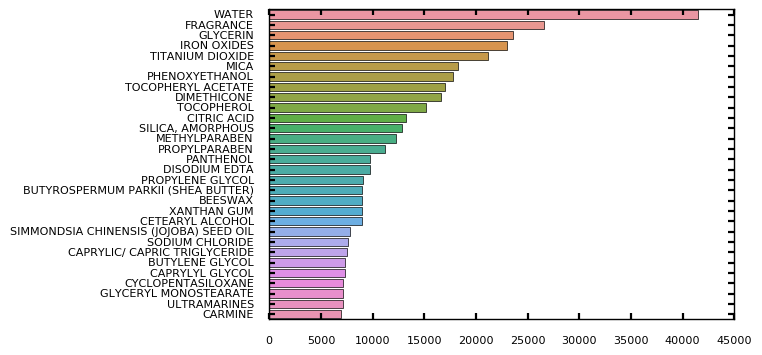

In [125]:
import seaborn as sns
x_cu = [cu for cu, frq in ing_cnts.most_common(30)]
y_frq = [frq for cu, frq in ing_cnts.most_common(30)]
fbar = sns.barplot(y = x_cu, x = y_frq)
# xlabels
for item in fbar.get_yticklabels():
    item.set_size(8)
for item in fbar.get_xticklabels():
    item.set_size(8)

In [110]:
type_mapping_df = pd.read_csv("Product Type Mapping.csv")
type_mapping = {}
for i in range(type_mapping_df.shape[0]):
    row = type_mapping_df.iloc[i]
    type_mapping[row['Detail']] = row['Type']


In [111]:
types = Counter()

for i in range(ewg_prd_df.shape[0]):
    fxl = ewg_prd_df.iloc[i]['product_type']
    if type(fxl) != float:
        for fx in fxl.split(','):
            types[type_mapping[fx]] +=1
    else:
        types['NA'] += 1
        

print(types.most_common(5))

[('Face Cream', 8835), ('Eye Makeup', 6112), ('Face Makeup', 6019), ('Body Sunscreen', 5755), ('Lips Makeup', 5133)]


In [112]:
for typ, amt in types.most_common():
    print(typ)

Face Cream
Eye Makeup
Face Makeup
Body Sunscreen
Lips Makeup
Face Cleanser
Hair Cleanser
Face Sunscreen
Body Cleanser
Nail Polish
Hair Condition
Hair Style
Body Fragrance
Face Acne
Lips Medicine
Body Cream
Body Oil
Hair Color
Body Deodorant
Hand Cleanser
Oral Cleanser
Body Bath
Eye Cream
Lips Sunscreen
Face Color
Hand Cream
Hair Medicine
Body Color
Brow Makeup
Face Shaving
Nail Medicine
Body Medicine
Oral Color
Feet Cream
Face Fragrance
Body Hair Remover
Eye Cleanser
Lips Plumper
Nail Cleanser
Feet Cleanser
Body Makeup
Face Medicine
Feet Deodorant
Eye Glue
Oral Deodorant
Nail Glue
Feet Medicine
Hair OIl
HAir Medicine


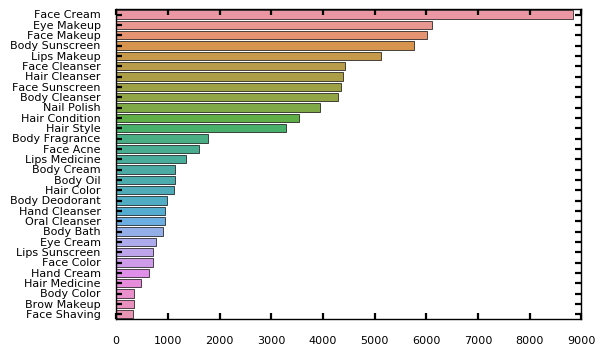

In [114]:
x_cu = [cu for cu, frq in types.most_common(30)]
y_frq = [frq for cu, frq in types.most_common(30)]
fbar = sns.barplot(y = x_cu, x = y_frq)
# xlabels
for item in fbar.get_yticklabels():
    item.set_size(8)
for item in fbar.get_xticklabels():
    item.set_size(8)

In [128]:
functions = Counter()
for i in range(ewg_ing_df.shape[0]):
    fxl = ewg_ing_df.iloc[i]['function_list']
    if type(fxl) != float:
        for fx in fxl:
            functions[fx.strip().lower()] +=1
    else:
        functions['NA'] += 1
        
print(functions.most_common(5))

[('NA', 2851), ('skin conditioning', 2333), ('skin-conditioning agent - miscellaneous', 1243), ('fragrance ingredient', 702), ('not reported', 700)]


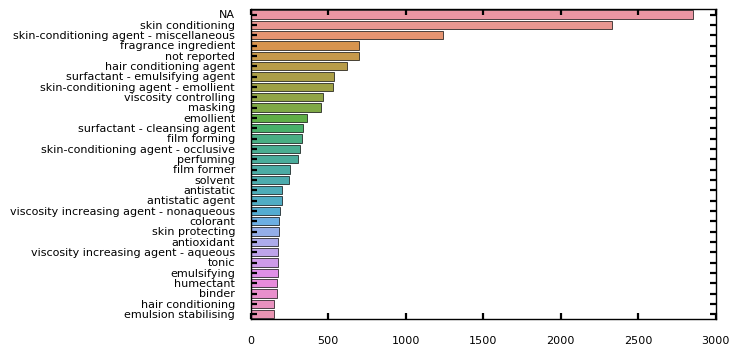

In [130]:
x_cu = [cu for cu, frq in functions.most_common(30)]
y_frq = [frq for cu, frq in functions.most_common(30)]
fbar = sns.barplot(y = x_cu, x = y_frq)
# xlabels
for item in fbar.get_yticklabels():
    item.set_size(8)
for item in fbar.get_xticklabels():
    item.set_size(8)

In [33]:
import tdidf

from tdidf import TfIdf

table = TfIdf()
for i in range(n):
    row = ewg_prd_df.iloc[i]
    table.add_document(row['product_name'],row['New_List'])
    #print(row['product_name'],row['New_List'])
#table.add_document("foo", ["alpha", "bravo", "charlie", "delta", "echo", "foxtrot", "golf", "hotel"])


In [34]:
matches = table.similarities(['TITANIUM DIOXIDE','WATER','GLYCERIN'])#ewg_prd_df['New_List'][0])
print(type(matches))
s_match = sorted(matches, key=lambda tup: tup[1], reverse = True)
#bad_ingredients({custid:'AShton', negingredients:['FORMALDEHYDE']})
print(s_match[0:10])

<class 'list'>
[['Neutrogena Healthy Skin Brightening Eye Perfector, Medium 15, 25 (old formulation)', 6.289604855574948e-05], ['Africare 100% Glycerin (old formulation)', 5.664117813650524e-05], ['Africare 100% Glycerin, 8.5 Ounces', 5.664117813650524e-05], ['Cococare 100% Glycerine', 5.664117813650524e-05], ['CVS USP Pure Glycerin', 5.664117813650524e-05], ["Earth's Care Natural Pure Vegatable Glycerin", 5.664117813650524e-05], ['Heritage Products Organic Vegetable Glycerin', 5.664117813650524e-05], ['Aura Cacia Vegetable Glycerin', 5.664117813650524e-05], ["Earth's Care Vegetable Glycerin", 5.664117813650524e-05], ["Caprina by Canus Fresh Goat's Milk Soap, Shea Butter (2014 formulation)", 5.2148687443836545e-05]]


In [37]:
sentences = list()
# one hot ingredients


for i_list in ewg_prd_df['New_List']:
    if len(i_list) < 2:
        continue
    else:
        #print(type(i_list))
        sentences.append(i_list)
len(sentences)

#print(sentences[2], len(sentences[2]))

71768

In [38]:
%reload_ext gensim.models.word2vec
# we could use also tensor flow, there are multiple implementations of word2vec
from gensim.models import word2vec

# Modelling Helpers, see above the# Set values for NN parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 2    # 50% of the corpus                    
num_workers = 1       # Number of CPUs
context = 60          # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   # threshold for configuring which 
                    # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = word2vec.Word2Vec(sentences)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

C:\Users\achevall\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [39]:
model.most_similar('D&C VIOLET 2')

[('D&C RED 34 CALCIUM LAKE', 0.8820211887359619),
 ('CI 60725', 0.853144109249115),
 ('DI-HEMA TRIMETHYLHEXYL DICARBAMATE', 0.8416337966918945),
 ('TRIPHENYL PHOSPHATE', 0.8363157510757446),
 ('PEG-9 DIMETHACRYLATE', 0.8348957300186157),
 ('CARBON BLACK', 0.8209826350212097),
 ('PPG-2 DIMETHICONE', 0.8194096088409424),
 ('BUTYL ALCOHOL', 0.8146262764930725),
 ('D&C RED 34', 0.8138282299041748),
 ('BENZOPHENONE-1', 0.8132554292678833)]

In [44]:
print(n)

72309


In [115]:
ingredient_to_type = collections.Counter()
for i in range(n):
    ings = ewg_prd_df.iloc[i]['New_List']
    typs = ewg_prd_df.iloc[i]['product_type']
    for ing in ings:
        if type(typs) != float:
            for typ in typs.split(','):
                ingredient_to_type[(ing,type_mapping[typ])] += 1

In [116]:

rows = []
for keys in ingredient_to_type.keys():
    rows.append([keys[0], keys[1], ingredient_to_type[keys]])



In [117]:
ing_df = pd.DataFrame(rows)
def get_popular(name):
    try:
        x = ing_df[ing_df[0]==name].sort_values(2,ascending=False)
        return(x.iloc[0,1])
    except:
        return('Other')
get_popular('TITANIUM DIOXIDE')

'Eye Makeup'

In [118]:
print(ing_df.sort_values([0,2],ascending=False))

                                         0               1   2
38311                         p-MENTHANONE   Face Cleanser   4
1860                          p-MENTHANONE      Face Cream   3
26777   nardostachys jatamansi (SPIKENARD)      Face Cream   7
21436   nardostachys jatamansi (SPIKENARD)   Face Cleanser   2
52652   nardostachys jatamansi (SPIKENARD)      Hair Style   1
27019                  gamma-VALEROLACTONE  Face Sunscreen   1
56694                      gamma-TERPINENE   Hand Cleanser   1
17079                    gamma-OCTALACTONE  Body Sunscreen  20
1907                     gamma-OCTALACTONE   Hair Cleanser   3
42073                    gamma-OCTALACTONE     Lips Makeup   3
58875                    gamma-OCTALACTONE   Hand Cleanser   3
15096                    gamma-OCTALACTONE   Body Cleanser   2
38494                    gamma-OCTALACTONE      Face Cream   1
39349                    gamma-OCTALACTONE  Face Sunscreen   1
59487                    gamma-OCTALACTONE  Hair Condit

In [40]:
corpus = model.wv.vocab.keys() #not sure the exact api
emb_tuple = tuple([model[v] for v in corpus if type(v) == str])
X = np.vstack(emb_tuple)


In [122]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity = 50)
X_tsne = tsne.fit_transform(X)

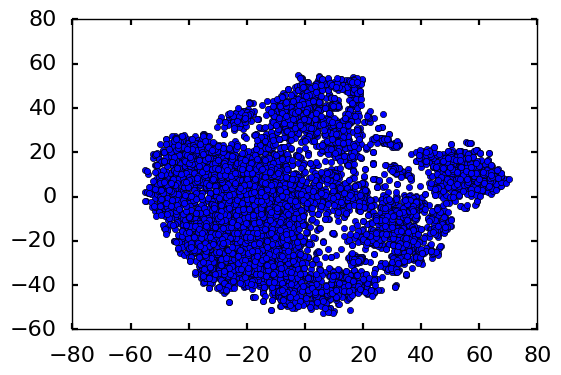

In [123]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])



In [119]:
typ_list = types.most_common(11)
track_2color = {typ_list[0][0]:"#55ff33", # blak
                typ_list[1][0]:"#FFFF00", #yellow
                typ_list[2][0]:"#1CE6FF", #cyan
                typ_list[3][0]: "#FF34FF", #pink 
                typ_list[4][0]:"#FF4A46", #red
                typ_list[5][0]:"#FFC300",  # green forest
                typ_list[6][0]:"#006FA6", # blue ocean
                typ_list[7][0]:"#A30059",# purple
                typ_list[8][0]:"#FFDBE5",  #light pink
                typ_list[9][0]: "#7A4900",  # gold or brown 
                #Add more later
                typ_list[10][0]:"#FDFFFF", # White 
                'Other': '#FFFFFF'
               }

color_vector = list()

i = 0
for v in corpus:
    typ = get_popular(v)
    try:
        color_vector.append(track_2color[typ])
    except:
        color_vector.append('#FFFFFF')

In [120]:
# ensemble the legend
lgend = list()
for l, c in track_2color.items():
    lgend.append(mpatches.Patch(color=c, label=l))

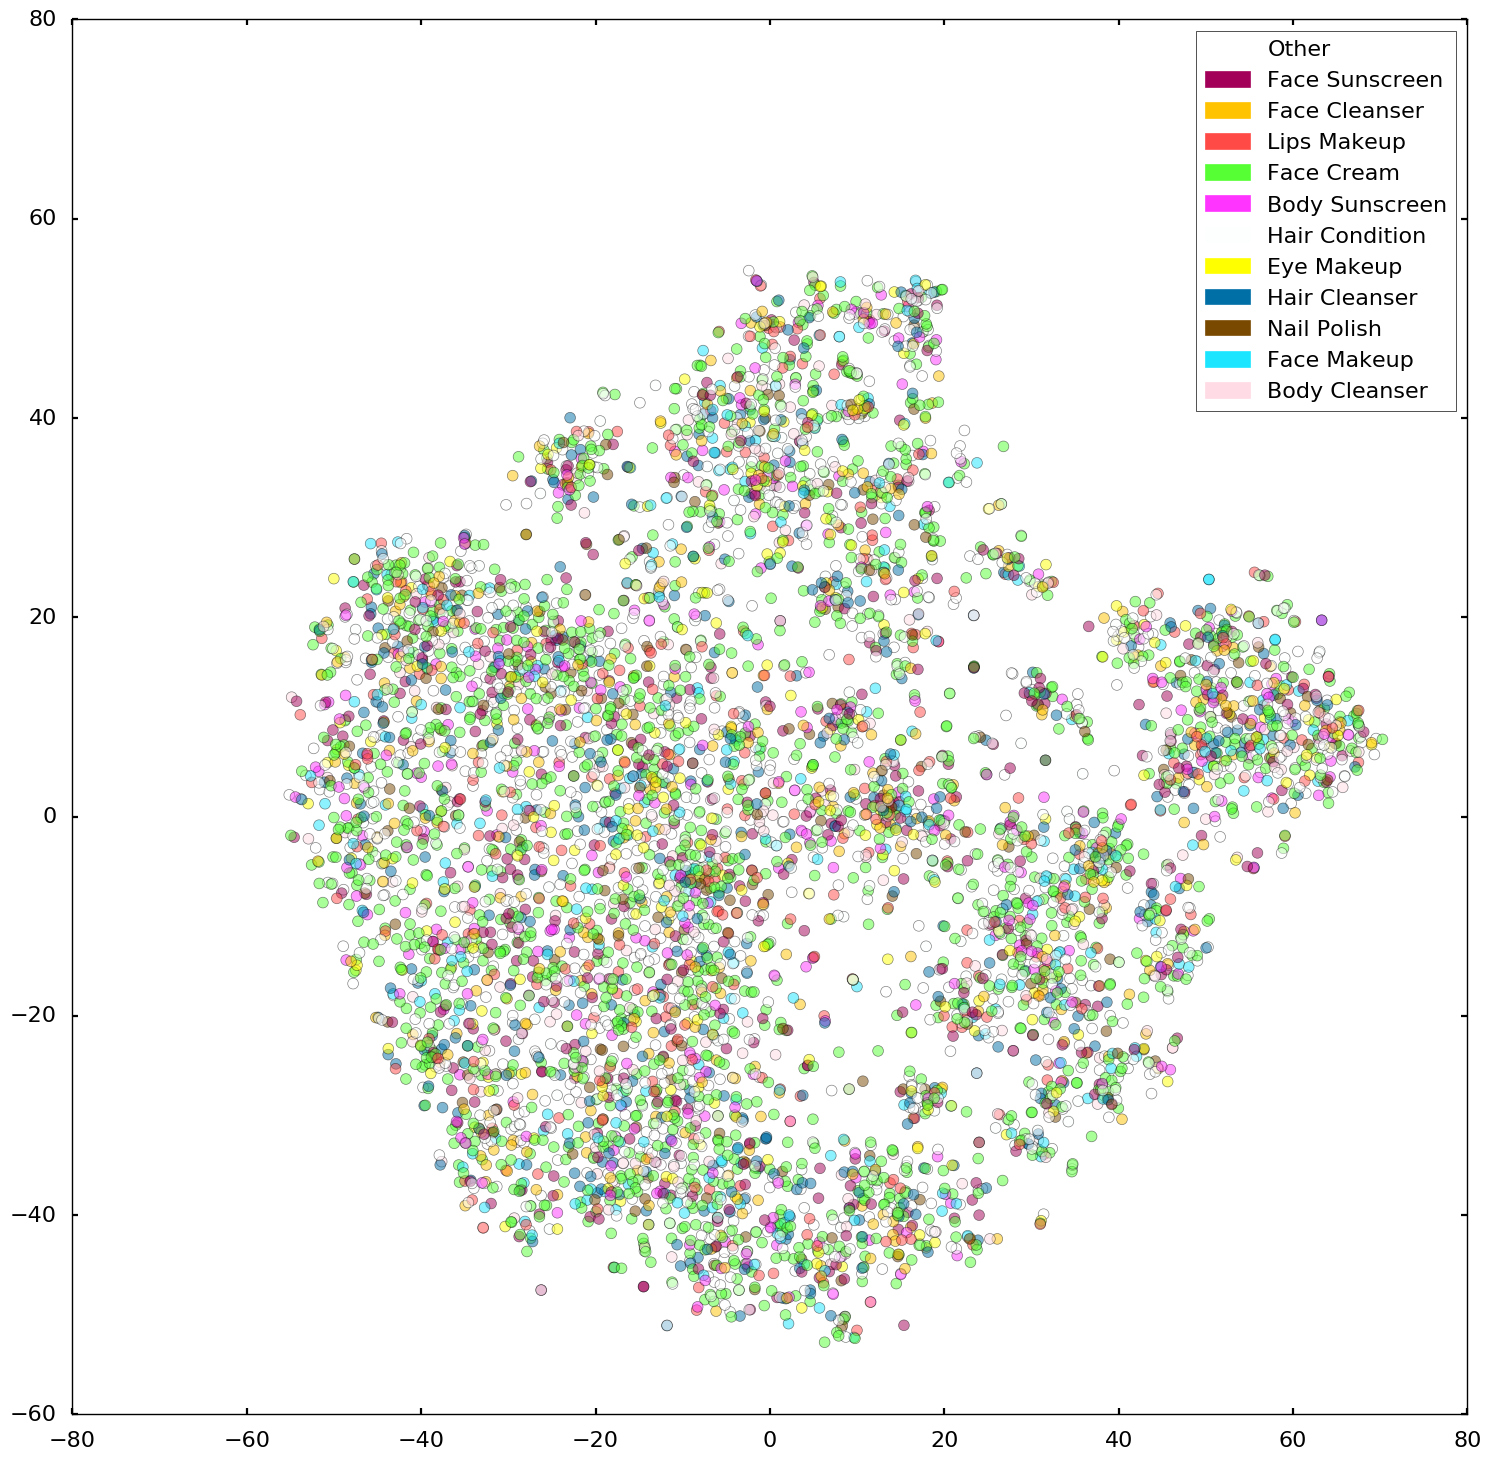

In [124]:
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_vector, alpha=.5, s=60)
#plt.xlim([-40,40])
#plt.ylim([-40,40])
plt.legend(handles=lgend)

In [ ]:
import numpy as np
X = np.zeros((n,len(ing_cnts.keys())))
prod_df = pd.DataFrame(X,columns = ing_cnts.keys())

for i in range(n):
    temp_ing = ewg_prd_df.iloc[i]['New_List']
    for col_name in range(len(temp_ing)):
        prod_df.loc[i][col_name] += 1


In [ ]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=50)
X_pca = X_pca.fit_transform(prod_df)

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])


In [ ]:
# Modelling Helpers, see above the description
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)


In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])


In [ ]:
print(len(X_tsne))

In [ ]:
X_pca = PCA(n_components=2)
X_pca = X_pca.fit_transform(prod_df)
plt.scatter(X_pca[:, 0], X_pca[:, 1])


In [ ]:
print(ewg_prd_df.iloc[0])

In [ ]:
export_df = pd.DataFrame(X_tsne)

In [ ]:
names = list(ewg_prd_df['product_name'])
export_df['product'] = names
export_df.to_csv('2D_Projection.csv', index=names)

In [ ]:
print(names[0:10])

In [ ]:
print(export_df.iloc[0]) 

In [ ]:
from gensim import corpora
documents = ["Human machine interface for lab abc computer applications",
              "A survey of user opinion of computer system response time",
              "The EPS user interface management system",
              "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

#This is a tiny corpus of nine documents, each consisting of only a single sentence.

#First, let’s tokenize the documents, remove common words (using a toy stoplist) as well as words that only appear once in the corpus:

 # remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
          for document in documents]

 # remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]
from pprint import pprint  # pretty-printer
pprint(texts)

In [ ]:
dictionary = corpora.Dictionary(texts)
#dictionary.save('/tmp/deerwester.dict')  # store the dictionary, for future reference
print(dictionary)

In [ ]:
print(corpora.Dictionary([x.encode('utf-8') if isinstance(x, str) else x for x in sentences]))

In [ ]:
for row in sentences:
    for word in row:
        Counter(word.encode('utf-8'))

In [ ]:
TypeError: coercing to str: need a bytes-like object, float found